# Exploratory Data Analysis

## Base imports -- *External Libraries!*
---
Libraries that are used in this project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import display, Markdown

### Setting A General Style

In [2]:
# Set a general style for all plots
sns.set(style="whitegrid", palette="muted")

In [3]:
def plot_corr_matrix(matrix, title):
    plt.figure(figsize=(8, 8))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix of {title}')
    return plt

## Loading the Dataset
### About the Dataset
----
The dataset focuses on various attributes of URLs to identify potential phishing attempts. It includes features such as URL length, domain characteristics, security indicators (like HTTPS usage), and content structure metrics. By analyzing these attributes, the dataset aims to differentiate between legitimate and malicious URLs, providing valuable insights for cybersecurity efforts. This information can be crucial for developing models to detect phishing threats effectively.

In [4]:
df = pd.read_csv("data/phishing_urls.csv")

## Summary of the DataSet


df.info(): Provides a concise summary of the DataFrame, including the number of non-null entries, data types, and memory usage.
df.describe(): Generates descriptive statistics for numeric columns, including count, mean, standard deviation, min, max, and quartiles.
df.shape: Returns a tuple representing the dimensions of the DataFrame (number of rows and columns).
df.isnull().sum(): Calculates the total number of missing (null) values for each column in the DataFrame.
df.duplicated().sum(): Counts the total number of duplicate rows in a DataFrame, helping to identify potential data redundancy.
df.dtypes: Displays the data types of each column in the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [6]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [7]:
# Summary of key statistics for the dataset
def summarize_data(df):
    summary = {}
    summary['Total Rows'] = df.shape[0]
    summary['Total Columns'] = df.shape[1]
    summary['Missing Values'] = df.isnull().sum().sum()
    summary['Duplicate Rows'] = df.duplicated().sum()
    summary['Data Types'] = df.dtypes.value_counts().to_dict()
    return summary

summarize_data(df)

{'Total Rows': 235795,
 'Total Columns': 56,
 'Missing Values': 0,
 'Duplicate Rows': 0,
 'Data Types': {dtype('int64'): 41, dtype('float64'): 10, dtype('O'): 5}}

## Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between multiple variables, indicating the strength and direction of their relationships. Values range from -1 to +1, where -1 signifies a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 means no correlation. This matrix is a valuable tool in data analysis for identifying patterns and dependencies among variables.

### Potential groupings of the most relevant numeric columns

### 1. URL Characteristics

This is a table that displays the correlation coefficients between below selected variables. This matrix helps to identify the strength and direction of relationships among the URL features, indicating how changes in one characteristic may relate to changes in another, which is crucial for analyzing patterns in phishing URLs.

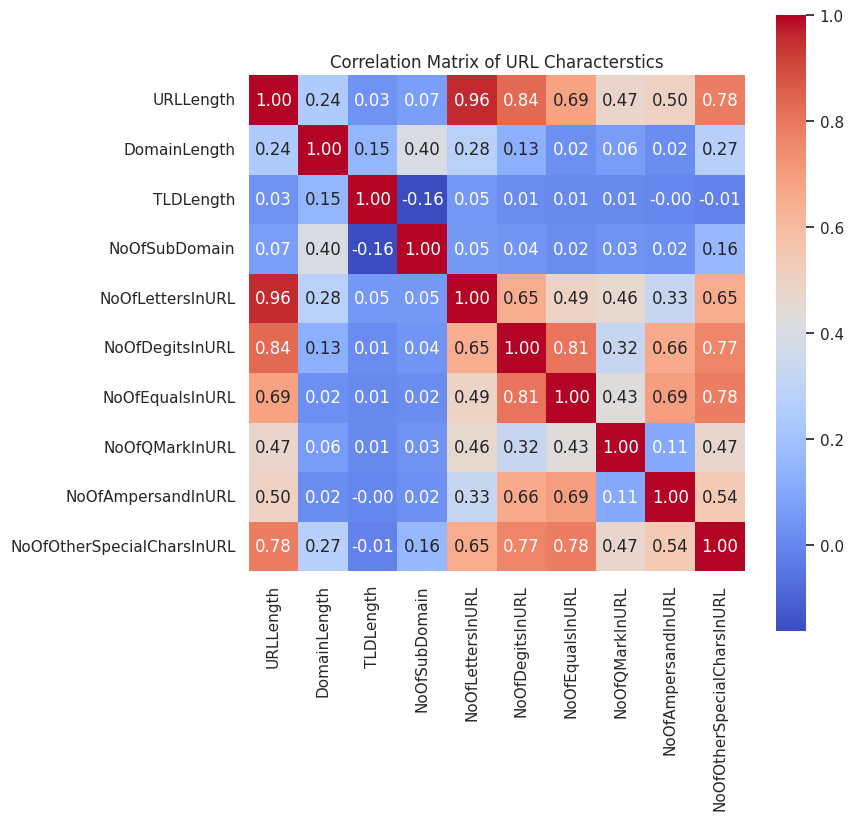

In [8]:
url_characteristics = [
    'URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain',
    'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL'
]
url_characteristics_df = df.filter(items=url_characteristics)

# Compute the correlation matrix
corr_matrix = url_characteristics_df.corr()

plot_corr_matrix(corr_matrix, 'URL Characterstics').show()

### 2. URL Legitimacy Indicators

This is a table that displays the correlation coefficients between below selected features. It helps to identify the strength and direction of relationships among the indicators that assess the legitimacy of URLs, providing insights into how various characteristics may influence the likelihood of a URL being legitimate or malicious.

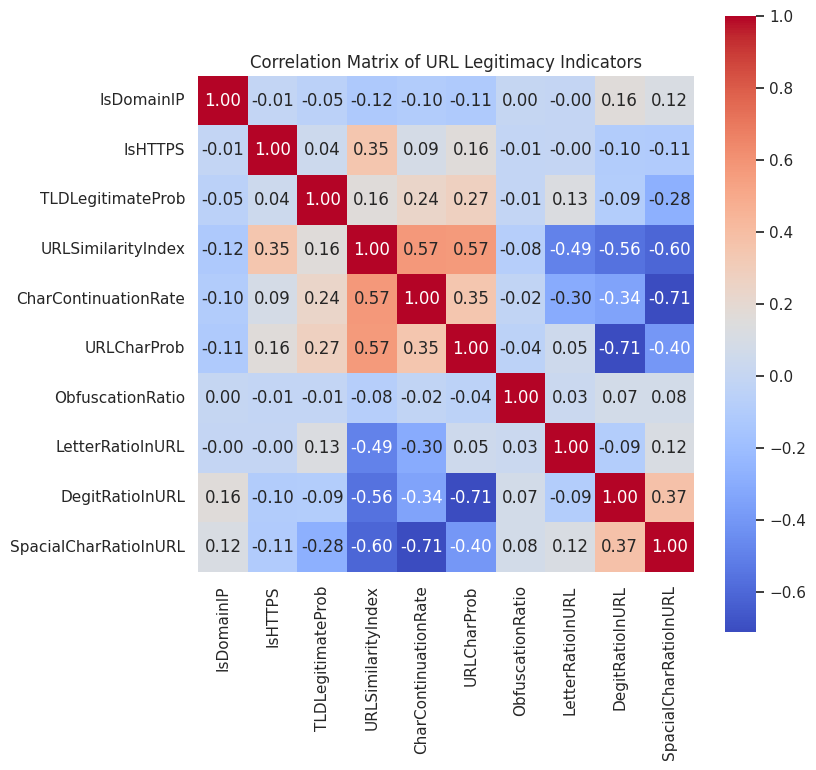

In [9]:
url_legitimacy_indicators = [
    'IsDomainIP', 'IsHTTPS', 'TLDLegitimateProb', 'URLSimilarityIndex',
    'CharContinuationRate', 'URLCharProb', 'ObfuscationRatio',
    'LetterRatioInURL', 'DegitRatioInURL', 'SpacialCharRatioInURL'
]

url_legitimacy_indicators_df = df.filter(items=url_legitimacy_indicators)

# Compute the correlation matrix
corr_matrix = url_legitimacy_indicators_df.corr()

plot_corr_matrix(corr_matrix, 'URL Legitimacy Indicators').show()

### 3. Web Page Content

This is a table that displays the correlation coefficients between below selected metrics. This matrix helps to identify the strength and direction of relationships among the characteristics that describe a webpage’s content and structure, providing insights into how these factors may influence usability, performance, and potential security risks.

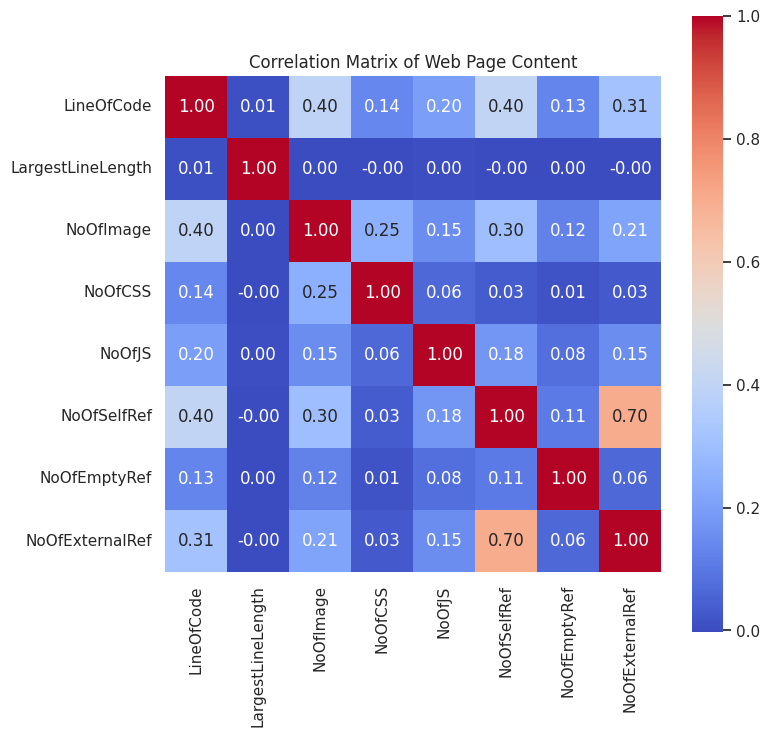

In [10]:
web_page_content = [
    'LineOfCode', 'LargestLineLength', 'NoOfImage', 'NoOfCSS',
    'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'
]

web_page_content_df = df.filter(items=web_page_content)

# Compute the correlation matrix
corr_matrix = web_page_content_df.corr()

plot_corr_matrix(corr_matrix, 'Web Page Content').show()

### 4. Web Page Features

Using this correlation matrix for the specified web page features helps identify relationships between attributes, such as how the presence of a title or favicon may influence user engagement and SEO performance. This analysis can reveal patterns that inform design decisions, ensuring that key elements are optimized for better usability. Additionally, it can highlight potential security vulnerabilities by showing correlations with features that may indicate risks. Overall, it serves as a valuable tool for data-driven improvements in web development and security practices.

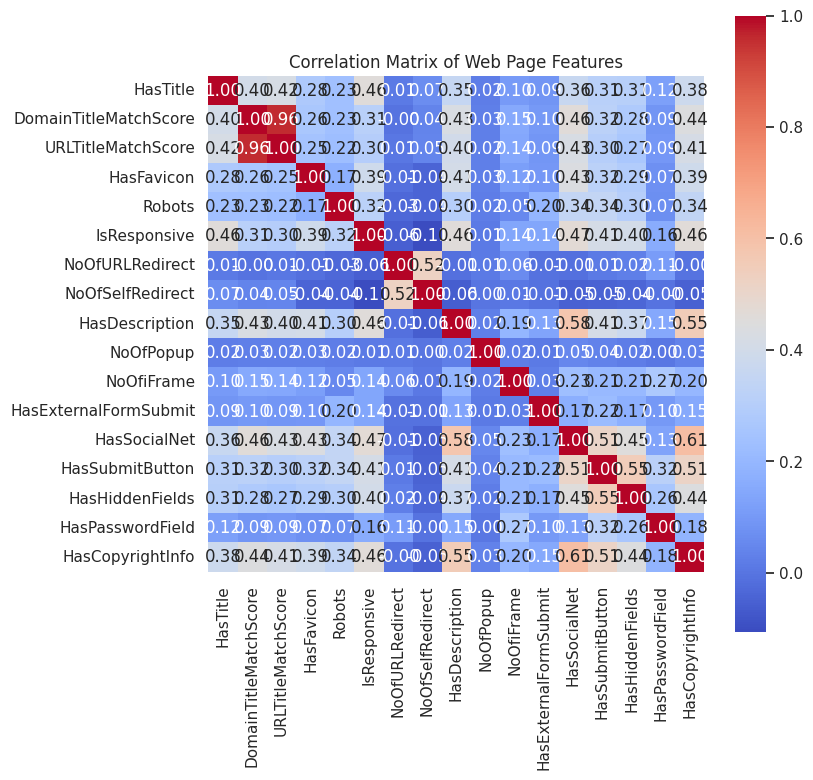

In [11]:
web_page_features = [
    'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
    'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
    'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
    'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField',
    'HasCopyrightInfo'
]

web_page_features_df = df.filter(items=web_page_features)

# Compute the correlation matrix
corr_matrix = web_page_features_df.corr()

plot_corr_matrix(corr_matrix, 'Web Page Features').show()

## URL Structure Analysis

* **URL Length:** Analysing the distribution of URL lengths (e.g., average, max, min) to see if phishing URLs tend to be longer or shorter compared to legitimate ones.
* **Domain Length:** Similar to URL length, check the distribution of domain lengths. Phishing URLs may use longer or shorter domains to obfuscate their intent.
* **Top-Level Domain (TLD) Analysis:** Investigate which TLDs (e.g., .com, .net, .uk) are more commonly used by phishing URLs. Phishing domains may prefer certain TLDs that are cheaper or easier to acquire.
* **Subdomain Usage:** Analyze the number of subdomains. Phishing URLs often hide their malicious intent in lengthy or complex subdomain structures.
* **Use of IP in Domain:** Check how often the domain is an IP address (binary flag IsDomainIP). Phishing URLs sometimes use IPs to avoid being flagged as suspicious.


URL Length Analysis:
count    235795.000000
mean         34.573095
std          41.314153
min          13.000000
25%          23.000000
50%          27.000000
75%          34.000000
max        6097.000000
Name: URLLength, dtype: float64

Domain Length Analysis:
count    235795.000000
mean         21.470396
std           9.150793
min           4.000000
25%          16.000000
50%          20.000000
75%          24.000000
max         110.000000
Name: DomainLength, dtype: float64

Top-Level Domain (TLD) Analysis:
TLD
com    112554
org     18793
net      7097
app      6508
uk       6395
co       5422
io       4201
de       3996
ru       3875
au       2979
Name: count, dtype: int64

Subdomain Usage Analysis:
count    235795.000000
mean          1.164758
std           0.600969
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: NoOfSubDomain, dtype: float64

Use of IP in Domain:
IsDomainIP
0    235157
1       638
Name: count

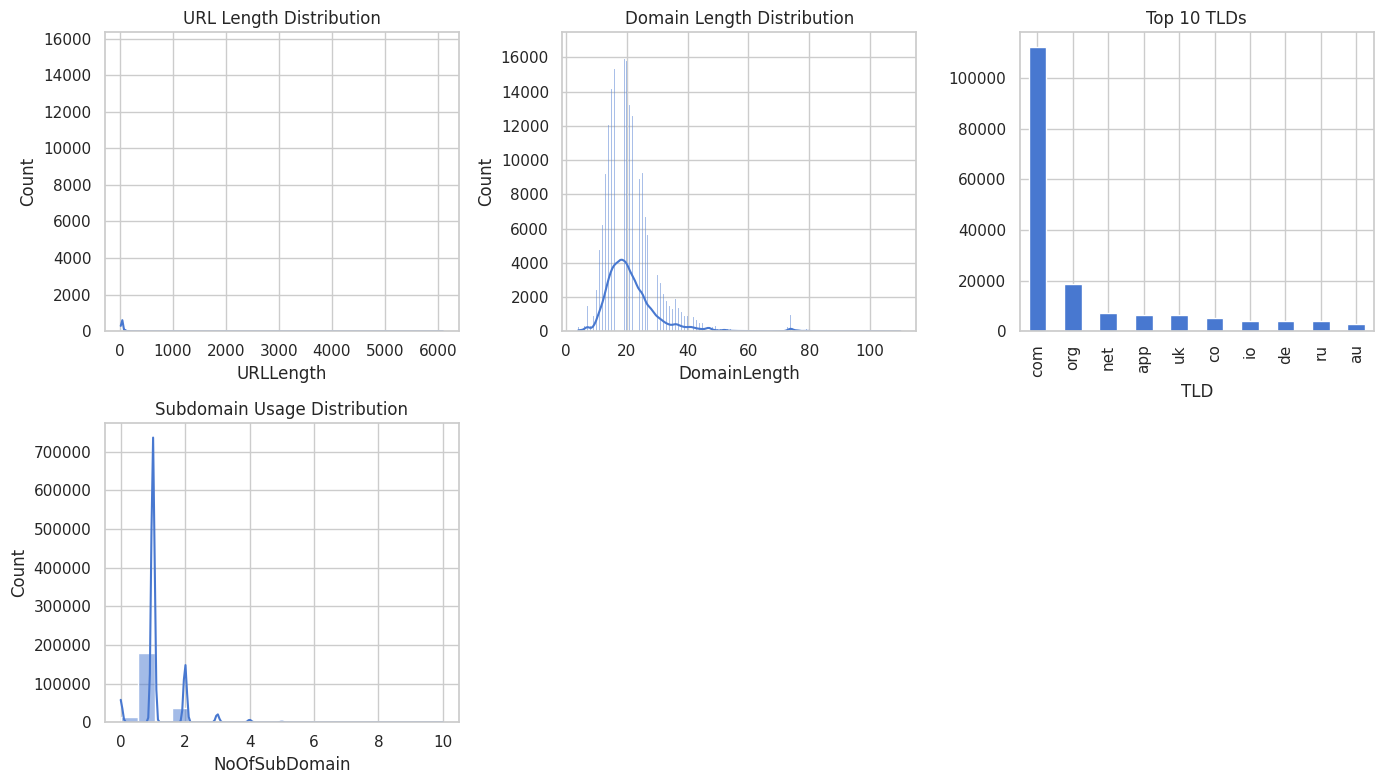

In [12]:
# URL Length Analysis
url_length_stats = df['URLLength'].describe()
print("URL Length Analysis:")
print(url_length_stats)

# Domain Length Analysis
domain_length_stats = df['DomainLength'].describe()
print("\nDomain Length Analysis:")
print(domain_length_stats)

# Top-Level Domain (TLD) Analysis
tld_counts = df['TLD'].value_counts()
print("\nTop-Level Domain (TLD) Analysis:")
print(tld_counts.head(10))  # Display top 10 TLDs

# Subdomain Usage Analysis
subdomain_stats = df['NoOfSubDomain'].describe()
print("\nSubdomain Usage Analysis:")
print(subdomain_stats)

# Use of IP in Domain
ip_usage = df['IsDomainIP'].value_counts()
print("\nUse of IP in Domain:")
print(ip_usage)

# Visualization
plt.figure(figsize=(14, 8))

# URL Length Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['URLLength'], kde=True)
plt.title('URL Length Distribution')

# Domain Length Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['DomainLength'], kde=True)
plt.title('Domain Length Distribution')

# Top 10 TLDs
plt.subplot(2, 3, 3)
tld_counts.head(10).plot(kind='bar')
plt.title('Top 10 TLDs')

# Subdomain Usage Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['NoOfSubDomain'], kde=True)
plt.title('Subdomain Usage Distribution')

plt.tight_layout()
plt.show()

## Frequency of TLDs (Top-level domains)
---
The plot shows the distribution of different TLDs used in the URLs. Some common TLDs like .com, .org, and .uk are frequent. This metric can hint whether certain TLDs are more associated with phishing.

In [13]:
# Calculate the frequency of each TLD
tld_counts = df['TLD'].value_counts()
tld_counts

TLD
com      112554
org       18793
net        7097
app        6508
uk         6395
          ...  
47            1
sharp         1
faith         1
243           1
ne            1
Name: count, Length: 695, dtype: int64

## Hypothesis 1
---
**URL Length and Phishing Likelihood**
Longer URLs may increase the likelihood of phishing attempts, as they can obscure the true destination and include misleading information. Phishers often use lengthy URLs to hide malicious domains within a sea of characters, making detection harder for users. Conversely, shorter, more straightforward URLs are typically associated with legitimate sites, enhancing user trust. Thus, analyzing URL length could be a valuable indicator in phishing detection models.

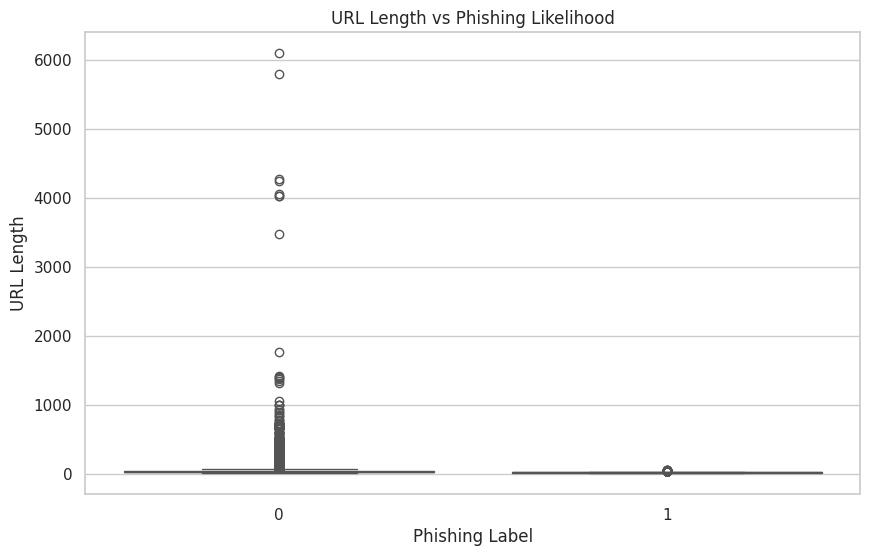

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='URLLength', data=df)
plt.title('URL Length vs Phishing Likelihood')
plt.xlabel('Phishing Label')
plt.ylabel('URL Length')
plt.show()

## Hypothesis 2
---
**Domain Characteristics and Legitimacy**
Shorter domain names are often perceived as more legitimate and trustworthy, as they tend to be easier to remember and type. In contrast, longer domain names may raise suspicion, as they can appear convoluted or spammy. Additionally, domains that closely resemble established brands but are excessively long may indicate potential phishing attempts. Therefore, analyzing domain length could serve as a useful metric in assessing a website’s legitimacy.

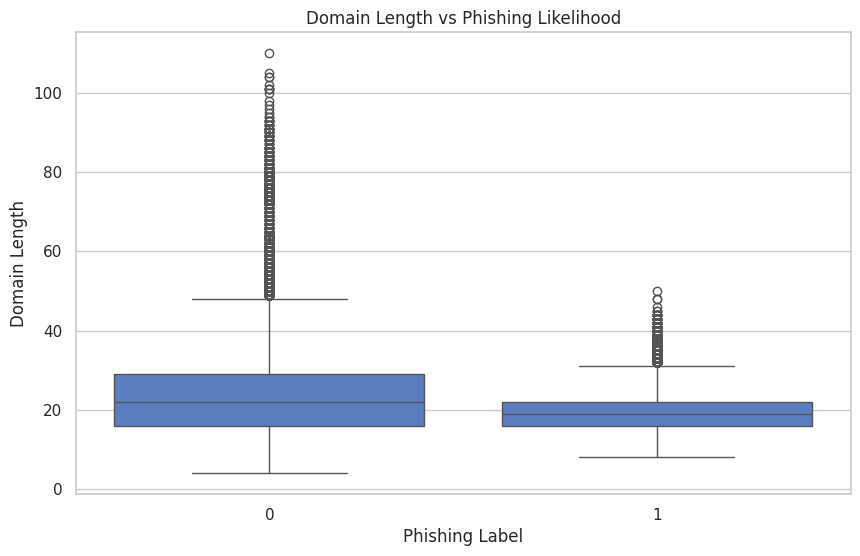

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='DomainLength', data=df)
plt.title('Domain Length vs Phishing Likelihood')
plt.xlabel('Phishing Label')
plt.ylabel('Domain Length')
plt.show()

## Hypothesis 3
---
 **Top-Level Domain (TLD) Influence**
The Top-Level Domain (TLD) significantly influences the likelihood of phishing attacks, with certain TLDs being more frequently exploited by cybercriminals. Research indicates that TLDs such as google, .gov, edu, .ml, and .ga are among the top offenders, often associated with over 90% of phishing attempts. In contrast, more established TLDs like .com and .net generally exhibit lower phishing ratios. This correlation underscores the importance of TLD analysis in enhancing phishing detection and prevention strategies.

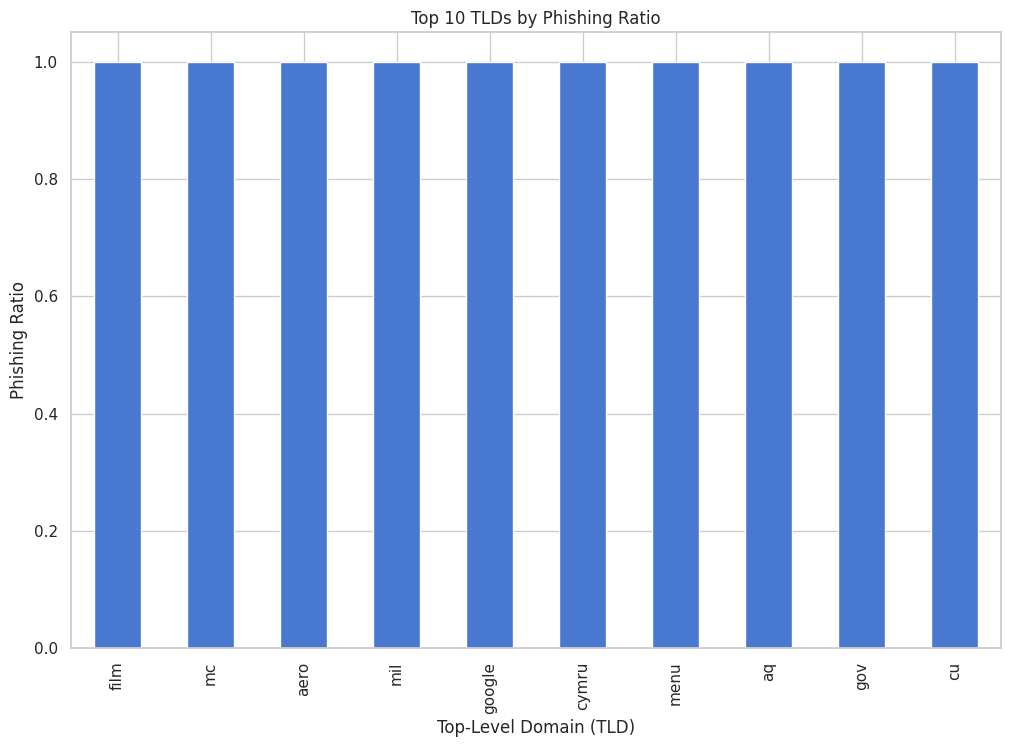

In [16]:
tld_phishing_counts = df.groupby(['TLD', 'label']).size().unstack().fillna(0)
tld_phishing_counts['Phishing_Ratio'] = tld_phishing_counts[1] / (tld_phishing_counts[0] + tld_phishing_counts[1])
tld_phishing_counts = tld_phishing_counts.sort_values(by='Phishing_Ratio', ascending=False)

plt.figure(figsize=(12, 8))
tld_phishing_counts['Phishing_Ratio'].head(10).plot(kind='bar')
plt.title('Top 10 TLDs by Phishing Ratio')
plt.xlabel('Top-Level Domain (TLD)')
plt.ylabel('Phishing Ratio')
plt.show()

## Hypothesis 4
---
 **HTTPS Usage**
 The usage of HTTPS is a critical factor in distinguishing between phishing and non-phishing URLs, as legitimate sites typically employ HTTPS to secure user data. Phishing sites often use HTTP to create a false sense of security, but many are increasingly adopting HTTPS to appear more credible. However, the presence of HTTPS alone does not guarantee legitimacy, as attackers can easily obtain SSL certificates. Thus, analyzing HTTPS usage alongside other indicators is essential for effective phishing detection.



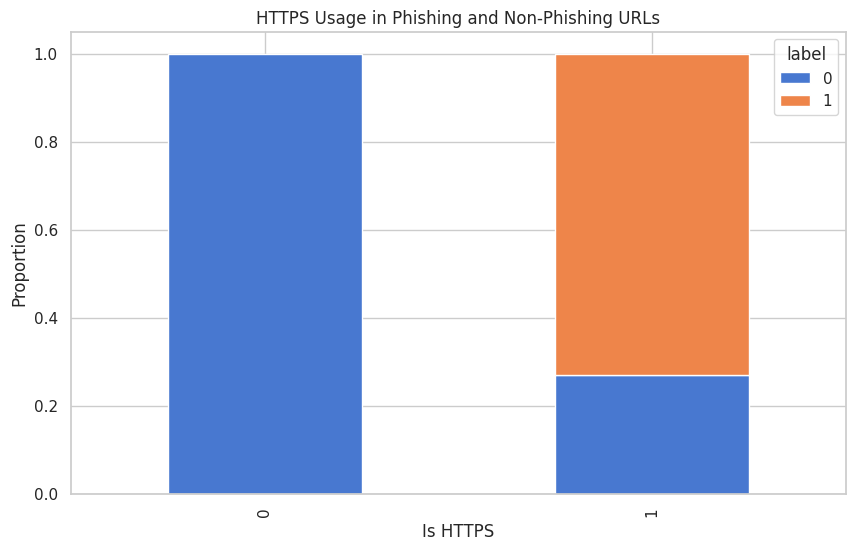

In [17]:
https_usage = df.groupby('IsHTTPS')['label'].value_counts(normalize=True).unstack()
https_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('HTTPS Usage in Phishing and Non-Phishing URLs')
plt.xlabel('Is HTTPS')
plt.ylabel('Proportion')
plt.show()

## Hypothesis 5
---
 **Obfuscation Techniques**
 Obfuscation techniques are commonly employed in phishing URLs to disguise malicious intent and mislead users. Phishing sites often use tactics such as URL shortening, character substitution, and misleading subdomains to create a façade of legitimacy. In contrast, non-phishing URLs typically maintain clear and straightforward structures that reflect their true purpose. Analyzing the presence and type of obfuscation can be crucial in distinguishing between phishing and legitimate websites.

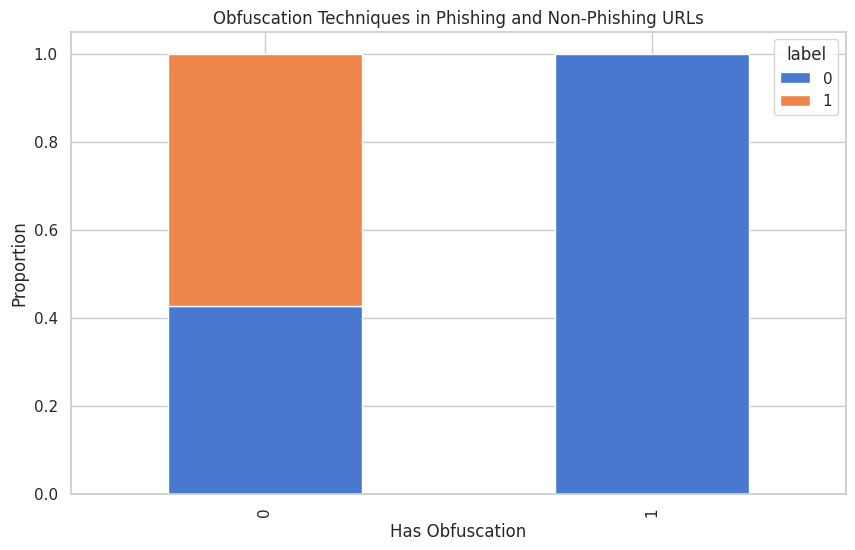

In [18]:
obfuscation_usage = df.groupby('HasObfuscation')['label'].value_counts(normalize=True).unstack()
obfuscation_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Obfuscation Techniques in Phishing and Non-Phishing URLs')
plt.xlabel('Has Obfuscation')
plt.ylabel('Proportion')
plt.show()

## Hypothesis 6
---
 **Content Features**
 The number of images, CSS files, and JavaScript (JS) files on a webpage can influence its likelihood of being a phishing site. Phishing pages often have fewer images and rely heavily on minimalistic designs to quickly load and deceive users. Conversely, legitimate websites typically use a balanced mix of content, including multiple images and well-structured CSS and JS files for enhanced functionality and aesthetics. Analyzing these elements can provide valuable insights into the potential phishing nature of a site.

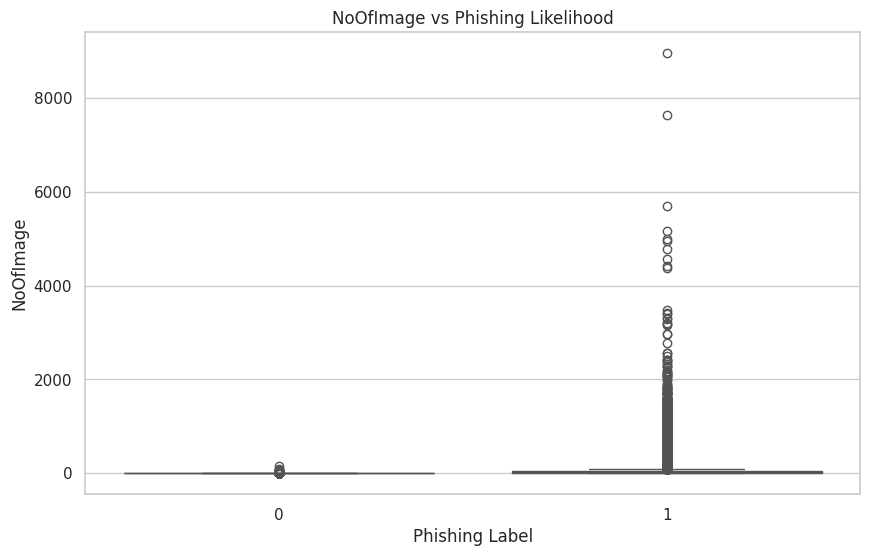

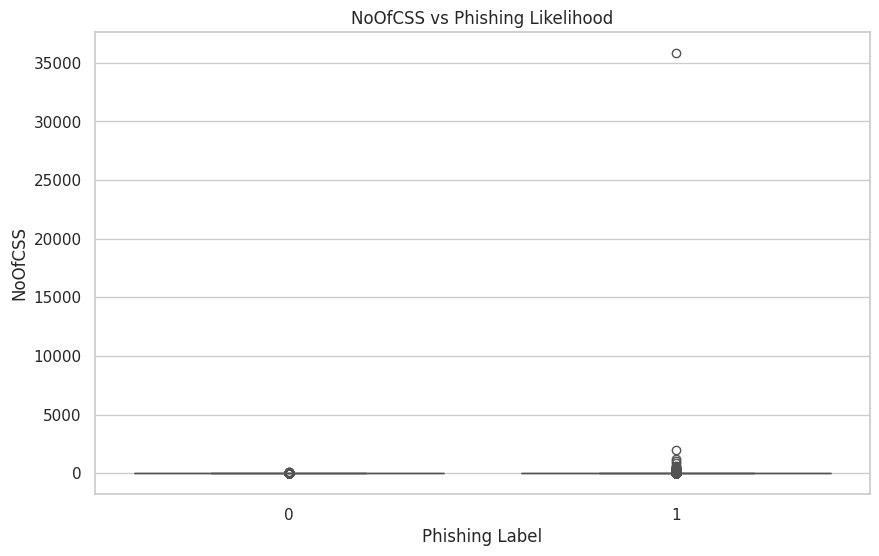

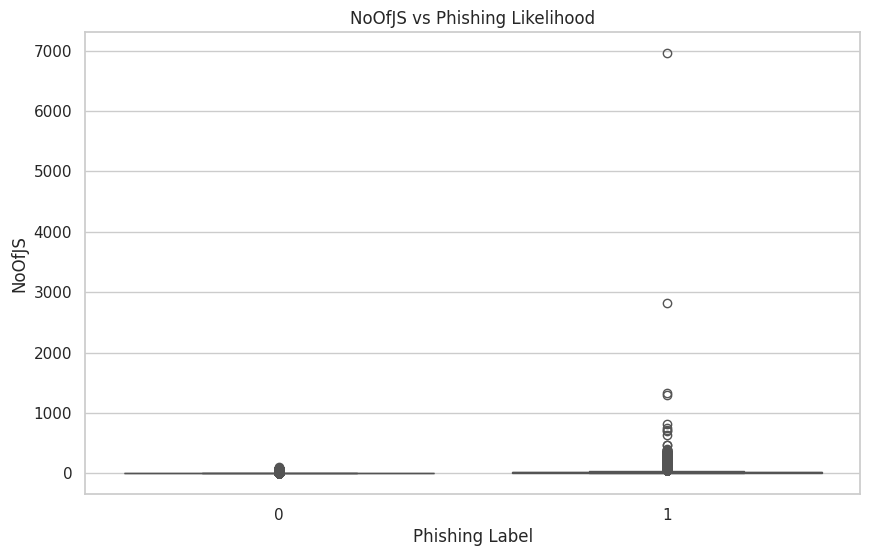

In [19]:
content_features = ['NoOfImage', 'NoOfCSS', 'NoOfJS']
for feature in content_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} vs Phishing Likelihood')
    plt.xlabel('Phishing Label')
    plt.ylabel(feature)
    plt.show()

## Hypothesis 7
---
 **Social Network Links**
 The presence of social network links on a webpage can be a significant indicator of its legitimacy, with phishing sites often lacking these links or using them deceptively. Legitimate websites typically include authentic social media profiles to build trust and engage with users, while phishing sites may either omit these links or link to fake accounts. Additionally, phishing URLs might use social media icons to create a false sense of credibility without actual connections. Analyzing the presence and authenticity of social network links can enhance the detection of phishing attempts.

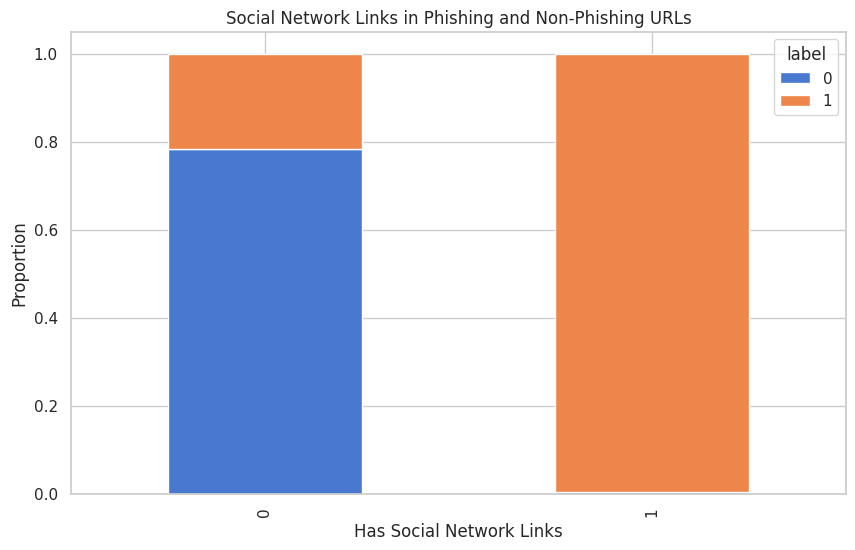

In [20]:
social_net_usage = df.groupby('HasSocialNet')['label'].value_counts(normalize=True).unstack()
social_net_usage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Social Network Links in Phishing and Non-Phishing URLs')
plt.xlabel('Has Social Network Links')
plt.ylabel('Proportion')
plt.show()

## Hypothesis 8
---
 **Redirects and Popups**
 The number of URL redirects and popups on a webpage can significantly indicate its phishing likelihood. Phishing sites often employ multiple redirects to obscure their true destination and create confusion, while excessive popups can be used to pressure users into providing sensitive information. In contrast, legitimate websites typically have minimal redirects and controlled popup usage to enhance user experience. Analyzing these factors can help identify potentially malicious sites more effectively.

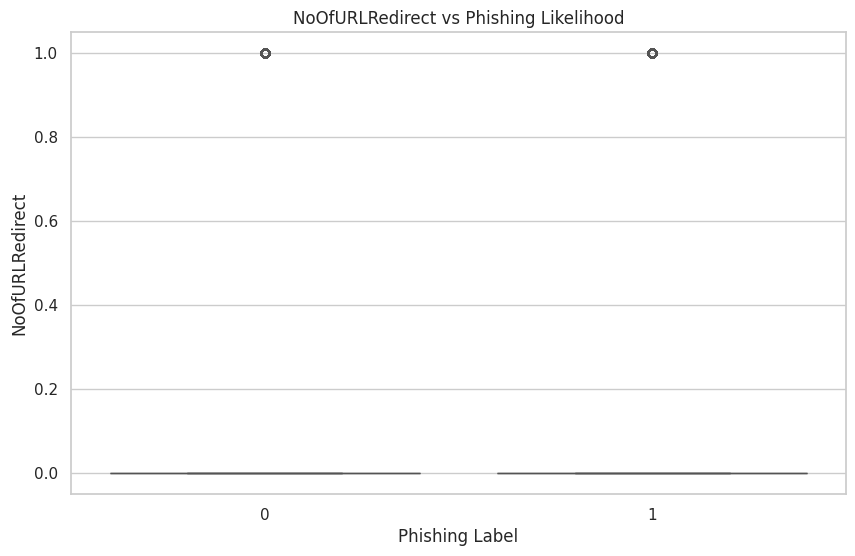

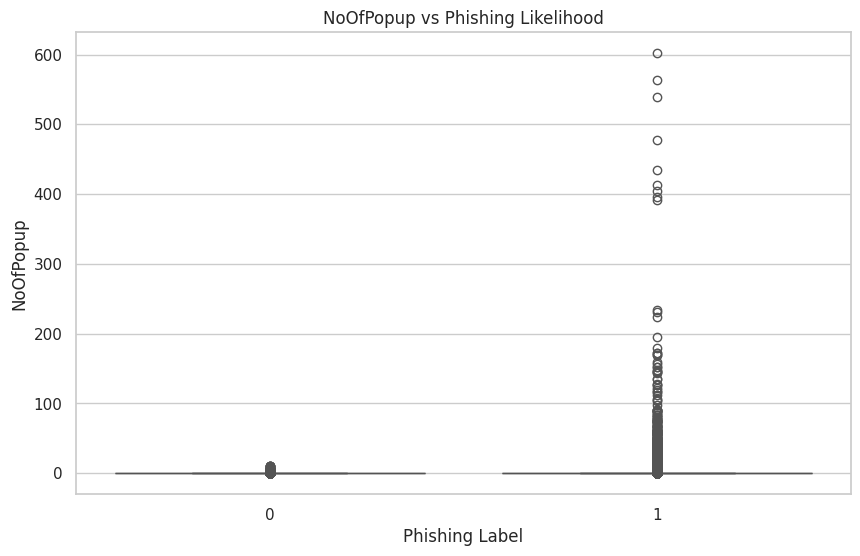

In [21]:
redirects_popups = ['NoOfURLRedirect', 'NoOfPopup']
for feature in redirects_popups:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} vs Phishing Likelihood')
    plt.xlabel('Phishing Label')
    plt.ylabel(feature)
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac08460d-c6ae-4140-88f4-81d0f3a60c24' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>